In [1]:
#!pip install -q ultralytics

In [2]:
import os
import shutil
import cv2
from matplotlib import pyplot as plt
#os.chdir('..')
#os.getcwd()

In [41]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [49]:
#!git clone https://github.com/zamarseny/detection_plate_symbols

Cloning into 'detection_plate_symbols'...
remote: Enumerating objects: 1806, done.
remote: Counting objects: 100% (1806/1806), done.
remote: Compressing objects: 100% (1210/1210), done.
remote: Total 1806 (delta 595), reused 1804 (delta 593), pack-reused 0
Receiving objects: 100% (1806/1806), 9.81 MiB | 12.98 MiB/s, done.
Resolving deltas: 100% (595/595), done.


In [3]:
#cd '/content/detection_plate_symbols'

In [4]:
#!git pull

In [5]:
#del YOLO
#shutil.rmtree('/content/detection_plate_symbols/detection_plate_symbols')
#shutil.rmtree('/content/detection_plate_symbols')

In [50]:

with open('/root/.config/Ultralytics/settings.yaml', 'r') as f:
  config_data = f.readlines()
config_data[1]='datasets_dir: /content/detection_plate_symbols/GBC_CV_attitude_test_2023_10/test_task\n'
#print(config_data[1])
print(config_data)
""" """
with open('/root/.config/Ultralytics/settings.yaml', 'w') as f:
  f.writelines(config_data)


['settings_version: 0.0.4\n', 'datasets_dir: /content/detection_plate_symbols/GBC_CV_attitude_test_2023_10/test_task\n', 'uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb\n', 'sync: true\n', "api_key: ''\n", 'clearml: true\n', 'comet: true\n', 'dvc: true\n', 'hub: true\n', 'mlflow: true\n', 'neptune: true\n', 'raytune: true\n', 'tensorboard: true\n', 'wandb: true\n']


In [6]:
import importlib
from ultralytics import YOLO
#importlib.reload(ultralytics.YOLO)

In [52]:


# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [53]:
N=list(range(27))
Name=[]
for i in range(27):
    Name+=[str(i).zfill(2)]

In [54]:
import yaml

plate_yaml = dict(
    train ='train',
    #train = 'GBC_CV_attitude_test_2023_10/test_task/train',
    val ='valid',
    #val = 'GBC_CV_attitude_test_2023_10/test_task/test',
    test='test',
    #test= 'GBC_CV_attitude_test_2023_10/test_task/test',
    nc =27,
    names = Name
)

with open('arabic_plate_nmbs.yaml', 'w') as outfile:
    yaml.dump(plate_yaml, outfile, default_flow_style=True)

In [55]:
config_data

['settings_version: 0.0.4\n',
 'datasets_dir: /content/detection_plate_symbols/GBC_CV_attitude_test_2023_10/test_task\n',
 'uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb\n',
 'sync: true\n',
 "api_key: ''\n",
 'clearml: true\n',
 'comet: true\n',
 'dvc: true\n',
 'hub: true\n',
 'mlflow: true\n',
 'neptune: true\n',
 'raytune: true\n',
 'tensorboard: true\n',
 'wandb: true\n']

In [56]:
results = model.train(data='arabic_plate_nmbs.yaml', epochs=50, imgsz=640)

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=arabic_plate_nmbs.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

In [58]:
metrics = model.val(data='arabic_plate_nmbs.yaml', split = 'test')

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/detection_plate_symbols/GBC_CV_attitude_test_2023_10/test_task/test.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]
                   all         30        199      0.921      0.966      0.993      0.777
                    00         30          5      0.937          1      0.995      0.804
                    01         30          2      0.802          1      0.995      0.401
                    02         30         12      0.963      0.917      0.989      0.769
                    03         30         12      0.904          1      0.957      0.781
                    04         30         17      0.945      0.941      0.992      0.781
                    05         30         21          1      0.97

In [60]:
metrics.results_dict

{'metrics/precision(B)': 0.9208474724456436,
 'metrics/recall(B)': 0.9656120747252827,
 'metrics/mAP50(B)': 0.9925618014464169,
 'metrics/mAP50-95(B)': 0.7770107902541031,
 'fitness': 0.7985658913733344}

In [9]:
model = YOLO("yolov8n.yaml")
#model = YOLO('arabic_plate_nmbs.yaml')
model = YOLO('runs/detect/train2/weights/best.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [89]:
test_pic = 'GBC_CV_attitude_test_2023_10/test_task/test/ckicup6z1000g246a7fphj2ry.jpeg'
pred = model.predict(
   source=test_pic,
   conf=0.5
)


image 1/1 /content/detection_plate_symbols/GBC_CV_attitude_test_2023_10/test_task/test/ckicup6z1000g246a7fphj2ry.jpeg: 320x640 1 00, 1 04, 2 06s, 2 10s, 1 16, 18.1ms
Speed: 4.8ms preprocess, 18.1ms inference, 3.1ms postprocess per image at shape (1, 3, 320, 640)


In [90]:
boxes = pred[0].boxes.xyxy.cpu().numpy().astype(int)
classes = pred[0].boxes.cls.cpu().numpy()

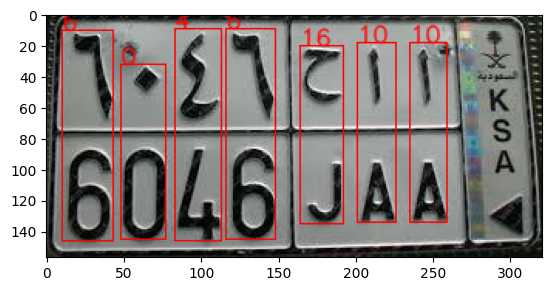

In [98]:
pic = cv2.imread(test_pic)
pic_cp = pic.copy()
for box, cl in zip(boxes, classes):
    pic_cp = cv2.rectangle(pic_cp, box[:2], box[2:], (255,0,0))
    pic_cp = cv2.putText(pic_cp, str(int(cl)), box[:2], cv2.FONT_HERSHEY_SIMPLEX ,  \
                   0.5, (255,0,0), 1, cv2.LINE_AA)
    #pic_cp = cv2.rectangle(pic_cp, box[:2], box[2:], (255,0,0))
plt.imshow(pic_cp)